# Part of Speech Tagging

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
%matplotlib inline

import spacy
nlp = spacy.load("en_core_web_sm")

import nltk
from nltk.tokenize import sent_tokenize
from nltk import pos_tag, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from textblob import TextBlob
from textblob.taggers import PatternTagger
from textblob.taggers import NLTKTagger

In [57]:
# Spacy Version
doc = nlp("Please book my flight to California")
for token in doc:
    print(token.text, token.pos_)

Please INTJ
book VERB
my PRON
flight NOUN
to ADP
California PROPN


In [58]:
# Spacy Version
doc = nlp("I read a very good book")
for token in doc:
    print(token.text, token.pos_)

I PRON
read VERB
a DET
very ADV
good ADJ
book NOUN


In [59]:
blob = TextBlob("Please book my flight to California", pos_tagger=PatternTagger())
blob.tags

[('Please', 'VB'),
 ('book', 'NN'),
 ('my', 'PRP$'),
 ('flight', 'NN'),
 ('to', 'TO'),
 ('California', 'NNP')]

In [60]:
blob = TextBlob("I read a very good book", pos_tagger=PatternTagger())
blob.tags

[('I', 'PRP'),
 ('read', 'VB'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('book', 'NN')]

In [44]:
tokenized_sent = sent_tokenize("Please book my flight to California")

[nltk.pos_tag(nltk.word_tokenize(word)) for word in tokenized_sent]

[[('Please', 'NNP'),
  ('book', 'NN'),
  ('my', 'PRP$'),
  ('flight', 'NN'),
  ('to', 'TO'),
  ('California', 'NNP')]]

In [54]:
# NLTK Version
tokenized_sent = sent_tokenize("I read a very good book")
[nltk.pos_tag(nltk.word_tokenize(word)) for word in tokenized_sent]

[[('I', 'PRP'),
  ('read', 'VBP'),
  ('a', 'DT'),
  ('very', 'RB'),
  ('good', 'JJ'),
  ('book', 'NN')]]

# Product Management Opportunities with POS Tagging

In [13]:
df = pd.read_csv("ClothingReviews.csv")
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,Tops,Blouses


In [14]:
df.dropna(subset=['Department Name', 'Class Name', 'Review Text'], inplace=True)

# Part-of-speech Tagging

In this portion of the analysis, we will use a method known as Part of Speech tagging or POS.  This method uses a lexicon-based lookup to identify what parts of speech words are, such as Nouns, Verbs, Adjectives, and Adverbs.  By utilizing these, we can perform various analysis such as the following:

- Word counts for different parts of speech to start giving us an overview of the most common parts of language used.
- Identify nouns used to tag products (e.g., dress, jacket, bottom, etc.).  This will give us a different look at the popularity of items vs. simply counting categories.
- Finally, we'll identify the top adjectives and adverbs for positive vs. negative reviews, telling us what words are used in each sentiment to describe the products.

## POS Tagging with Spacy

In [15]:
def pos_tag(text):
    
    df = pd.DataFrame(columns = ['Word', 'POS'])
    
    doc = nlp(text)
    for token in doc:
        df = df.append({'Word': token.text, 'POS': token.pos_}, ignore_index=True)
        
    return df

In [16]:
# Take a random sample of reviews (5,000)
df2 = df.sample(5000, random_state=42).copy()
# Create an empty dataframe to store the results
df_pos = pd.DataFrame(columns = ['Word', 'POS'])
# Iterate through the reviews and append each POS tag to the dataframe
df_pos = pos_tag(df2['Review Text'].to_string())
df_pos.shape

(72225, 2)

In [17]:
# Get rid of some of the uninteresting POS tags
df_pos = df_pos[(df_pos['POS'] != 'SPACE') & (df_pos['POS'] != 'PUNCT') & (df_pos['POS'] != 'NUM')]

In [18]:
df_top_pos = df_pos.groupby('POS')['POS'].count().\
    reset_index(name='count').sort_values(['count'],ascending=False).head(15)

In [19]:
df_top_pos

,POS,count
7,NOUN,9116
9,PRON,6803
5,DET,5983
13,VERB,5528
0,ADJ,4894
3,AUX,3576
1,ADP,3443
2,ADV,2888
4,CCONJ,2054
10,PROPN,1363


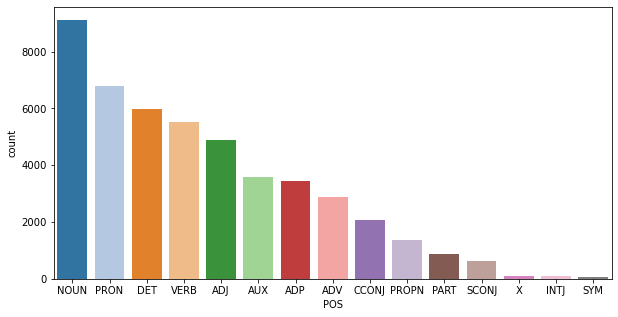

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(data =df_top_pos, x='POS', y='count', palette="tab20");

### Identify Top Product Nouns

In [21]:
df_nn = df_pos[df_pos['POS'] == 'NOUN'].copy()
df_nn.groupby('Word')['Word'].count().reset_index(name='count').\
    sort_values(['count'], ascending=False).head(10)

,Word,count
437,dress,928
1418,top,617
1349,sweater,238
1200,shirt,222
306,color,193
1236,size,165
946,pants,138
490,fabric,129
1310,store,118
721,jeans,111


In [22]:
df_adj = df_pos[df_pos['POS'] == 'ADJ'].copy()
df_adj.groupby('Word')['Word'].count().reset_index(name='count').\
    sort_values(['count'], ascending=False).head(10)

,Word,count
288,great,254
96,beautiful,221
171,cute,218
542,soft,157
147,comfortable,121
446,perfect,113
411,nice,90
469,pretty,75
533,small,73
365,little,72
